# **Неделя 11. feature engineering**

## **Домашняя работа**

Ссылка на форму: https://forms.gle/UDDairgp3NywgvSHA

Дедлайн: 11.05.20

Импортируем необходимые модули

In [231]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from catboost import CatBoostRegressor # нужно установить библиотеку catboost
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42

Загрузим датасет California Housing dataset

In [232]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [233]:
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

**Описание датасета:**
Датасет содержит информацию о жилых районах штата Калифорния. 20640 Записей, 8 признаков. 

**Описание признаков:**
1. *MedInc* - медианный доход домохозяйства
2. *HouseAge* - медианный возраст домов
3. *AveRooms* - среднее число комнат
4. *AveBedrms* - среднее число спален
5. *Population* - число людей, проживающих в районе
6. *AveOccup* - среднее число людей, проживающих в доме
7. *Latitude* - широта, геогр. координаты 
8. *Longitude* - долгота, геогр. координаты

**Целевая переменная:** Медианная стоимость дома в районе, единица измерения $10 тыс.

In [234]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


В этой домашней работе вам предстоит реализовывать различные гипотезы и тестировать их. 

Метрика качества - *mean_absolute_error*.

Разбиение на обучающую и тестовую выборку случайное.

Cтратегия кросс-валидации - ShuffledSplit.

**Во всех следующих заданиях нужно использовать модель, полученную с помощью *create_model()*.**

In [235]:
def create_model():
    """
    create instance of CatBoostRegressor model
    """
    return CatBoostRegressor(random_state=RANDOM_STATE, logging_level='Silent', iterations=60)


разделим выборку на обучающую и тестовую часть

In [236]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = RANDOM_STATE, shuffle=True)

print('train size: {}'.format(train.shape[0]))
print('test size: {}'.format(test.shape[0]))

train size: 16512
test size: 4128


####  **Задание 1.** 
Попробуем обучить модель на датасете без дополнительных признаков и преобразований. Оцените качество модели на кросс-валидации. Модель нужно создать с помощью функции *create_model()*. В форме укажите значение метрики.

Разделить выборку на фолды нужно с помошью sklearn.model_selection.KFold c параметрами:
1. n_splits = 5
2. shuffle = True
3. random_state = RANDOM_STATE

Для проведения кросс-валидации можно использовать функции cross_val_score или cross_val_predict, в которые нужно передать созданный KFold. Можете попробовать сделать кросс-валидацию с помощью самого объекта KFold.

Метрика - mean_absolute_error. Кросс-валидацию необходимо проводить на train части датасета. 

*Не забудьте исключить target.*

In [237]:
from sklearn.model_selection import KFold, cross_val_score

In [238]:
train['target']

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: target, Length: 16512, dtype: float64

In [253]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

predictions = cross_val_score(model, X=train.drop('target', axis=1), y=train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 2)

print(score)

-0.33


------------------------

В датасете есть интересные признаки - координаты районов. Координаты часто являются очень полезными, но не в исходном виде. Посмотрим, есть ли зависимость между target и расположением района.

Нарисуйте диаграмму рассеивания, в которой ось x - широта, y - долгота, окрасьте точки по значению target.  

Latitude - широта, геогр. координаты
Longitude - долгота, геогр. координаты

In [240]:
data['target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

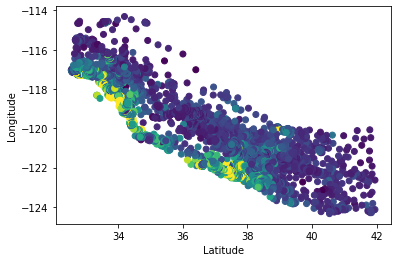

Text(0.5, 0, 'Longitude')

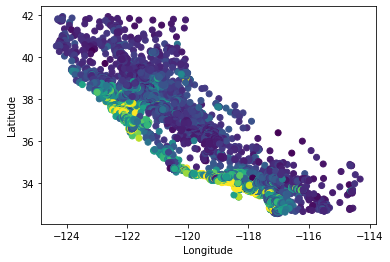

In [241]:
#your code here 
plt.scatter(data['Latitude'], data['Longitude'], c=data['target'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.scatter(data['Longitude'], data['Latitude'], c=data['target'])
plt.ylabel('Latitude')
plt.xlabel('Longitude')

####  **Задание 2.** 

Если сопоставить диаграмму с картой штата Калифорния, то будет видно, что цены выше у крупных городов и на побережье, попробуем добавить такой признак. Посчитайте расстояние от района до следующих крупных городов:
1. Лос-Анджелес (34.05, -118.24)
2. Сан-Хосе (37.33, -121.88)
3. Сан-Франциско (37.77, -122.41)
4. Сакраменто (38.58, -121.49)

Расстояние от каждого города до района должно быть отдельным признаком.

Добавьте новые признаки в датасет, оцените качество на кросс-валидации как в 1 задании. В форме укажите значение метрики.

In [242]:
#your code here 
from sklearn.metrics.pairwise import euclidean_distances, paired_distances


cities = {'To LA' : [34.05, -118.24], 'To Sh' : [37.33, -121.88],
          'To SF' : [37.77, -122.41], 'To S' : [38.58, -121.49]}
distances = pd.DataFrame(columns=cities)
coordinates = np.array([data['Latitude'], data['Longitude']])
k = np.array([coordinates[:,0], cities['To LA']])
print(k)
euclidean_distances(k,k)[0][1]

[[  37.88 -122.23]
 [  34.05 -118.24]]


5.530732320407812

In [243]:
def distances_to_cities(X):
    t = X.copy()
    cities = {'To LA' : [34.05, -118.24], 'To Sh' : [37.33, -121.88],
              'To SF' : [37.77, -122.41], 'To S' : [38.58, -121.49]}
    coordinates = np.array([t['Latitude'], t['Longitude']])
    for city, coord in cities.items():
        d = []
        for i in range(len(X)):
            k = np.array([coordinates[:,i], coord])
            d.append(euclidean_distances(k,k)[0][1])
        t[city] = d
    return t

In [244]:
updated_train = distances_to_cities(train)

In [245]:
updated_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,To LA,To Sh,To SF,To S
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030,1.805464,6.698276,7.385662,7.372144
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821,0.291204,5.148980,5.836309,5.850214
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726,2.321573,3.014780,3.660191,4.048024
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934,1.768191,6.654510,7.341417,7.340061
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965,3.144281,2.151488,2.791451,2.469028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.292,0.388973,5.288563,5.976839,5.958263
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.978,0.810555,5.546044,6.234012,6.105506
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.221,0.141421,4.810405,5.498045,5.511316
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.835,5.128284,0.262488,0.488467,1.104943


------------------------

In [254]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

predictions = cross_val_score(model, X=updated_train.drop('target', axis=1), y=updated_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 2)

print(score)

-0.32


####  **Задание 3.** 

Можно пойти дальше и добавить еще городов или других объектов, до которых можно посчитать расстояние, но тогда число признаков может значительно вырасти, что почти всегда приводит к плохим последствиям. Преобразуем расстояния до городов в новый категориальный признак - самый близкий город.

Постройте такой признак, удалите признаки расстояний до городов и оцените качество на кросс-валидации как в 1 задании. В форме укажите значение метрики. 

Названия городов можно закодировать с помощью sklearn.preprocessing.LabelEncoder.

In [247]:
#your code here 
from sklearn.preprocessing import LabelEncoder
k = updated_train.copy()

m = k[cities.keys()].iloc()[0]
#print(m)
k[cities.keys()]
v = {m[0] : 'To LA',
     m[1] : 'To SH',
     m[2] : 'To SF',
     m[3] : 'To S'}
v.get(min(list(v.keys())))

'To LA'

In [248]:
def nearest_city(X):
    t = X.copy()
    nearest_city = []
    for i in range(len(t)):
        m = t[cities.keys()].iloc()[i]
        v = {m[0] : 0, m[1] : 1,
             m[2] : 2, m[3] : 3}
        nearest_city.append(v.get(min(list(v.keys()))))
    t['Nearest city'] = nearest_city
    return t

In [255]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

predictions = cross_val_score(model, X=updated_train.drop('target', axis=1).drop(cities.keys(), axis=1), y=updated_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 2)

print(score)

-0.33


### ------------------------

####  **Задание 4.** 

Попробуем добавить более сложный признак. Номер кластера, в который попадает район. Постройте такой признак, оцените качество с новым признаком на кросс-валидации. В форме укажите значение метрики.

Постройте кластеризацию на всех признаках с помощью алгоритма KMeans со следующими параметрами:
1. n_clusters = 20 
2. random_state = RANDOM_STATE

Перед кластеризацией данные необходимо отмасштабировать с помощью StandartScaler. 
Масштабирование и вычисление параметров кластеризации необходимо производить на train фолдах, а применять их к train и test фолдам.

Используйте все рассчитанные ранее признаки.

In [250]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [251]:
updated_train = nearest_city(updated_train)

In [256]:
updated_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,To LA,To Sh,To SF,To S,Nearest city
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03,1.030,1.805464,6.698276,7.385662,7.372144,0
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16,3.821,0.291204,5.148980,5.836309,5.850214,0
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48,1.726,2.321573,3.014780,3.660191,4.048024,0
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11,0.934,1.768191,6.654510,7.341417,7.340061,0
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80,0.965,3.144281,2.151488,2.791451,2.469028,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,2.292,0.388973,5.288563,5.976839,5.958263,0
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43,0.978,0.810555,5.546044,6.234012,6.105506,0
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,2.221,0.141421,4.810405,5.498045,5.511316,0
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,2.835,5.128284,0.262488,0.488467,1.104943,1


In [ ]:
def cluster_number(X):
    t = X.copy()
    

In [257]:
kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
#train = updated_train.drop(cities.keys(), axis=1).copy()
#train = updated_train.copy()

scores_on_folds = []
for train_ids, test_ids in kfold.split(updated_train): #kfold будет итеративно генерировать id train и test фолдов
    
    #разделяем выборку на train и test фолды
    train_folds = train.iloc[train_ids] 
    test_folds = train.iloc[test_ids]

    #создаем скейлер, алгоритм кластеризации и модель
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=20, random_state=RANDOM_STATE)
    model = create_model()
    
    #your code here
    scaled_train = scaler.fit_transform(train_folds)
    scaled_test = scaler.transform(test_folds)
    
    train_clusters = kmeans.fit_predict(np.delete(scaled_train, 8, axis=1))
    test_clusters = kmeans.predict(np.delete(scaled_test, 8, axis=1))
    
    scaled_train = np.append(scaled_train, train_clusters[:, None], axis=1)
    #print(scaled_train.shape)
    scaled_test = np.append(scaled_test, test_clusters[:, None], axis=1)

    model.fit(X=np.delete(scaled_train, 8,axis=1), y=scaled_train[:,8])
    predictions = model.predict(np.delete(scaled_test, 8,axis=1))
    
    score = mean_absolute_error(scaled_test[:,8], predictions)
    scores_on_folds.append(score)

In [260]:
print('score_by_fold: {}'.format(scores_on_folds))
print('cross-validation score: {}'.format(round(np.mean(scores_on_folds), 2)))

score_by_fold: [0.2935526709049891, 0.2848106047964843, 0.28238837206117473, 0.28159930450905546, 0.28343128858744565]
cross-validation score: 0.29


------------------------

####  **Задание 5.** 

Оценивать качество на тестовой выборке стоит только в самом конце, не важно генерируем мы новые признаки или подбираем гиперпараметры модели. Если часто смотреть на метрики на тестовой выборке и делать по ним выводы, то можно переобучиться под тест. Оценка качества на тесте получится недостоверной, по ней нельзя сделать вывод о работе модели с реальными данными. 

1. Оцените качество модели на кросс-валидации на train на всех построенных в домашней работе признаках.
2. Рассчитайте признаки из домашней работы для train и test выборок.
3. Оцените качество на test, обучившись на train.

Сравните качество на кросс-валидации и test. В форме укажите разницу между значением метрики на train и cv (train_score - cv_core).

Используйте все рассчитанные раннее признаки.

In [261]:
def append_cluster(X):
    t = X.copy()
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=20, random_state=RANDOM_STATE)
    
    scaled_X = scaler.fit_transform(t.drop('target', axis=1))
    clusters = kmeans.fit_predict(scaled_X)
    t['Cluster'] = clusters
    
    return t

In [262]:
fully_updated_train = append_cluster(nearest_city(distances_to_cities(train)))
fully_updated_test = append_cluster(nearest_city(distances_to_cities(test)))

In [265]:
#your code here
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

predictions = cross_val_score(model, X=fully_updated_train.drop('target', axis=1), y=fully_updated_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 2)

print(score)

-0.32


In [266]:
model = create_model()

model.fit(X=fully_updated_train.drop('target', axis=1), y=fully_updated_train['target'])
predicted = model.predict(fully_updated_test.drop('target', axis=1))

score = mean_absolute_error(fully_updated_test['target'], predicted)
print(round(score, 2))

0.36


------------------------

####  **Задание 6.** 

Придумайте еще минимум 2 признака или преобразования данных, рассчитайте их и оцените качество кросс-валидации. Ответ дайте в формате: описание признака/преобразования, почему он может работать, значение метрики.


MedInc - медианный доход домохозяйства
HouseAge - медианный возраст домов
AveRooms - среднее число комнат
AveBedrms - среднее число спален
Population - число людей, проживающих в районе
AveOccup - среднее число людей, проживающих в доме
Latitude - широта, геогр. координаты
Longitude - долгота, геогр. координаты

In [ ]:
#your code here
data.describe()

In [ ]:
def mean_rooms(X):
    t = X.copy()
    h = []
    t_mean = t['AveRooms'].mean()
    for room in t['AveRooms']:
        h.append((1 if t_mean <= room else 0))      
    t['More than everage rooms'] = h
    return t

In [ ]:
def mean_bedrooms(X):
    t = X.copy()
    h = []
    t_mean = t['AveBedrms'].mean()
    for room in t['AveBedrms']:
        h.append((1 if t_mean <= room else 0))
    t['More than everage bedrooms'] = h
    return t

In [ ]:
def mean_house_age(X):
    t = X.copy()
    h = []
    t_mean = t['HouseAge'].mean()
    for age in t['HouseAge']:
        h.append((1 if t_mean <= age else 0))
    t['More than everage age'] = h
    return t

In [ ]:
def mean_occup(X):
    t = X.copy()
    h = []
    t_mean = t['AveOccup'].mean()
    for age in t['AveOccup']:
        h.append((1 if t_mean <= age else 0))
    t['More than everage occup'] = h
    return t

In [ ]:
def mean_pop(X):
    t = X.copy()
    h = []
    t_mean = t['Population'].mean()
    for pop in t['Population']:
        h.append((1 if t_mean <= pop else 0))
    t['More than everage pop'] = h
    return t

In [ ]:
def mean_med(X):
    t = X.copy()
    h = []
    t_mean = t['MedInc'].mean()
    for pop in t['MedInc']:
        h.append((1 if t_mean <= pop else 0))
    t['More than everage MedInc'] = h
    return t

In [ ]:
def max_med(X):
    t = X.copy()
    h = []
    t_mean = t['MedInc'].max()
    for pop in t['MedInc']:
        h.append((1 if t_mean <= pop else 0))
    t['More than everage MedInc'] = h
    return t

In [ ]:
from sklearn.cluster import DBSCAN


def append_DBSCAN_cluster(X):
    t = X.copy()
    scaler = StandardScaler()
    db = DBSCAN()
    
    scaled_X = scaler.fit_transform(t.drop('target', axis=1))
    clusters = db.fit_predict(scaled_X)
    t['DBSCAN cluster'] = clusters
    
    return t

In [ ]:
def mean_of_all_rooms(X):
    t = X.copy()
    h = []
    t_mean_rooms = t['AveRooms'].mean()
    t_mean_bedrooms = t['AveBedrms'].mean()
    for i in range(len(t)):
        p = data[['AveRooms','AveBedrms']].iloc[i]
        room = p[0]
        bedroom = p[1]
        h.append((1 if (t_mean_rooms <= room and t_mean_bedrooms <= bedroom) else 0))
    t['More than everage of all rooms'] = h
    return t

In [ ]:
#u = append_DBSCAN_cluster(data)
u['DBSCAN cluster'].unique()

In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

predictions = cross_val_score(model, X=fully_updated_train.drop('target', axis=1), y=fully_updated_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [273]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

rooms_train = mean_rooms(fully_updated_train)
#rooms_test = mean_rooms(fully_updated_test)

predictions = cross_val_score(model, X=rooms_train.drop('target', axis=1), y=rooms_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 4)

print(score)

-0.32


In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

bedrooms_train = mean_bedrooms(fully_updated_train)


predictions = cross_val_score(model, X=bedrooms_train.drop('target', axis=1), y=bedrooms_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

age_train = mean_house_age(fully_updated_train)


predictions = cross_val_score(model, X=age_train.drop('target', axis=1), y=age_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

occup_train = mean_occup(fully_updated_train)


predictions = cross_val_score(model, X=occup_train.drop('target', axis=1), y=occup_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

pop_train = mean_pop(fully_updated_train)


predictions = cross_val_score(model, X=pop_train.drop('target', axis=1), y=pop_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

all_train = mean_of_all_rooms(fully_updated_train)


predictions = cross_val_score(model, X=all_train.drop('target', axis=1), y=all_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [270]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

med_train = mean_med(fully_updated_train)


predictions = cross_val_score(model, X=med_train.drop('target', axis=1), y=med_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 3)

print(score)

-0.318


In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

med_train = max_med(fully_updated_train)


predictions = cross_val_score(model, X=med_train.drop('target', axis=1), y=med_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

In [ ]:
model = create_model()

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

db_train = append_DBSCAN_cluster(fully_updated_train)


predictions = cross_val_score(model, X=db_train.drop('target', axis=1), y=db_train['target'], 
                              cv=kfold, scoring='neg_mean_absolute_error')

score = round(np.mean(predictions), 5)

print(score)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD9FF78648>,
      dtype=object)

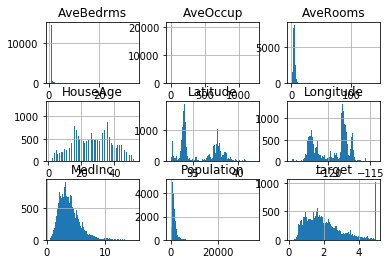

In [267]:
data.hist(bins=100)

In [268]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000
